In [1]:
import numpy as np
import pandas as pd
import utils
from scipy import signal 
import matplotlib.pyplot as plt
import os

Accelerometer format: Time (s), X (m/s^2), Y (m/s^2), Z (m/s^2) \
Gyroscope format: Time (s), X (rad/s), Y (rad/s), Z (rad/s)

In [2]:
# load csv data as pandas dataframe

filename_acc = 'data/gebaeude64_cali/Accelerometer.csv'
filename_gyro = 'data/gebaeude64_cali/Gyroscope.csv'

acc_df = pd.read_csv(filename_acc, sep=',',header=0)
gyro_df = pd.read_csv(filename_gyro, sep=',',header=0)
gyro_df

,Time (s),X (rad/s),Y (rad/s),Z (rad/s)
0,0.043001,0.002013,-0.000236,0.000681
1,0.053015,-0.001147,-0.000179,-0.000780
2,0.063030,0.001977,-0.000747,-0.000140
3,0.073044,0.000652,-0.002692,-0.000723
4,0.083058,0.004979,-0.000812,0.003117
...,...,...,...,...
1621,16.275771,0.002138,-0.000044,-0.001012
1622,16.285784,0.000838,-0.001062,-0.001705
1623,16.295799,0.002831,0.001050,0.000882
1624,16.305812,0.001635,0.000103,0.002369


In [54]:
# dataframe to numpy array

acc = np.asarray([
    acc_df['Time (s)'].to_numpy(dtype=float),
    acc_df['X (m/s^2)'].to_numpy(dtype=float), 
    acc_df['Y (m/s^2)'].to_numpy(dtype=float), 
    acc_df['Z (m/s^2)'].to_numpy(dtype=float)
])
gyro = np.asarray([
    gyro_df['Time (s)'].to_numpy(dtype=float),
    gyro_df['X (rad/s)'].to_numpy(dtype=float), 
    gyro_df['Y (rad/s)'].to_numpy(dtype=float), 
    gyro_df['Z (rad/s)'].to_numpy(dtype=float)
])

gyro


array([[ 4.30009583e-02,  5.30149583e-02,  6.30299583e-02, ...,
         1.62957985e+01,  1.63058125e+01,  1.63158265e+01],
       [ 2.01277994e-03, -1.14706159e-03,  1.97663344e-03, ...,
         2.83102505e-03,  1.63451023e-03,  3.99220735e-03],
       [-2.36142892e-04, -1.78884715e-04, -7.47048762e-04, ...,
         1.05034700e-03,  1.03436876e-04, -9.74344555e-04],
       [ 6.81484584e-04, -7.79525377e-04, -1.40054151e-04, ...,
         8.81813932e-04,  2.36860895e-03,  1.31287146e-04]])

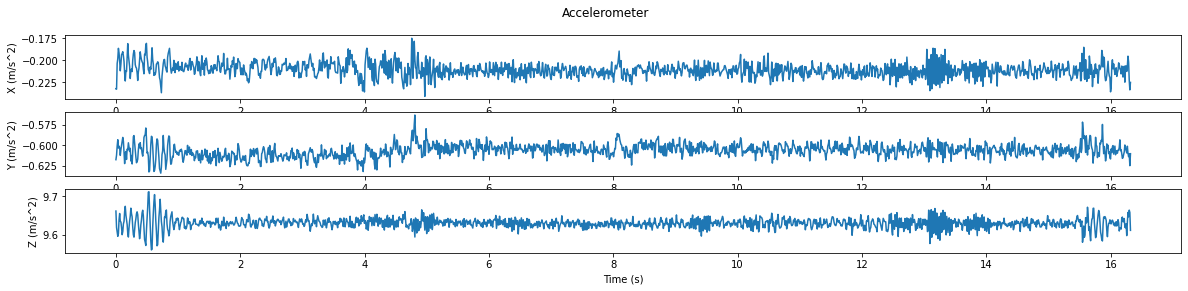

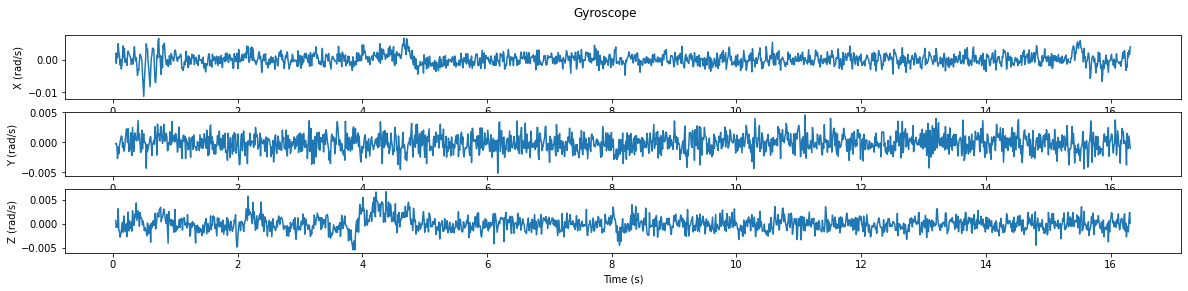

In [4]:
utils.plot_acc(acc, 'all')
utils.plot_gyro(gyro, 'all')

In [5]:
# norm of accelerometer & gyroscope

acc_norm = np.linalg.norm(acc[1::], axis=0)
acc_norm = np.array([acc[0], acc_norm])
gyro_norm = np.linalg.norm(gyro[1::], axis=0)
gyro_norm = np.array([gyro[0], gyro_norm])


[ 0.04300096  0.0012603  -0.00079462 -0.00017028]
[ 0.04300096  0.0012603  -0.00079462 -0.00017028]


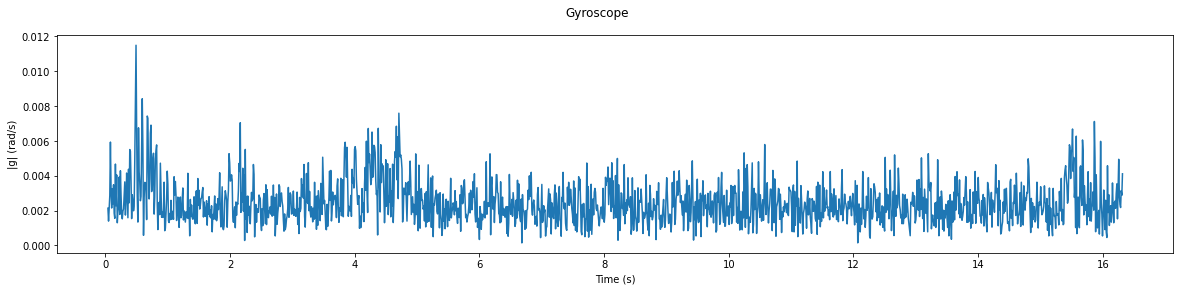

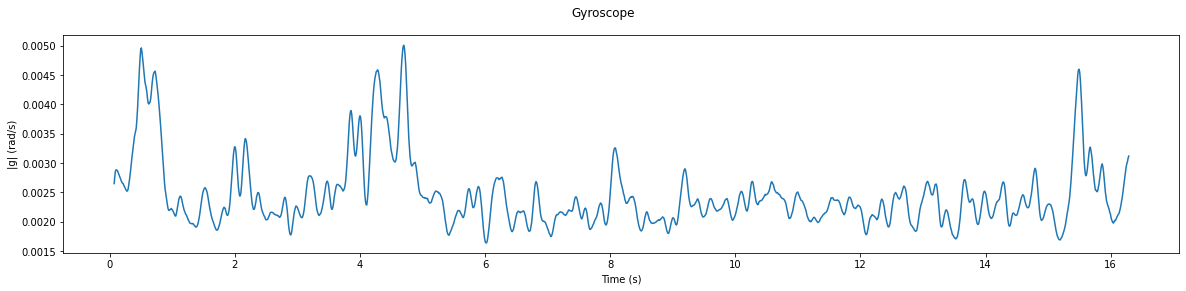

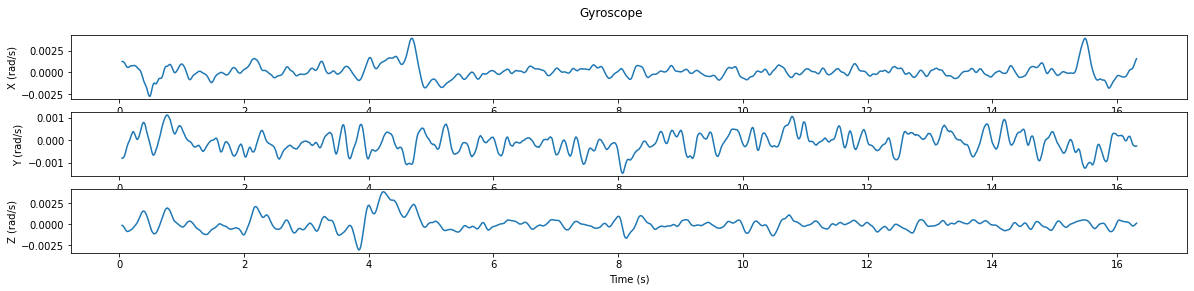

In [63]:
# filter signals with weighed moving average filter

filtered_acc = utils.weighted_moving_average(acc_norm, dim=1, wl=21)
filtered_gyro = utils.weighted_moving_average(gyro_norm, dim=1, wl=21)

filtered_acc_all = np.concatenate([np.expand_dims(acc[0], 0), utils.weighted_moving_average(acc[1::], dim=1, wl=21)],  axis=0)
filtered_gyro_all = np.concatenate([np.expand_dims(gyro[0], 0), utils.weighted_moving_average(gyro[1::], dim=1, wl=21)],  axis=0)

utils.plot_gyro(gyro_norm[0:3000, 0:3000], type='norm')
utils.plot_gyro(filtered_gyro[0:3000, 0:3000], type='norm')
utils.plot_gyro(filtered_gyro_all[0:3000, 0:3000], type='all')


In [64]:
# save to folder

filename = os.path.basename(os.path.dirname(filename_acc))

np.save("preprocessed_data/" + filename + "_acc.npy", filtered_acc)
np.save("preprocessed_data/" + filename + "_gyro.npy", filtered_gyro)

np.save("preprocessed_data/" + filename + "_acc_all.npy", filtered_acc_all)
np.save("preprocessed_data/" + filename + "_gyro_all.npy", filtered_gyro_all)